<a href="https://colab.research.google.com/github/nadhifazlfa/praktikum.big.data.week1/blob/main/praktikum_big_data_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

+----+----+
|Nama|Usia|
+----+----+
| Ali|  34|
|Dina|  45|
+----+----+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+
| Nama|Usia|
+-----+----+
| Dina|  45|
|  Ali|  34|
|Citra|  29|
| Budi|  23|
+-----+----+



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg

spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()
print(spark)

data = [
    ("Ali", "Manager", 34),
    ("Budi", "Karyawan Kontrak", 23),
    ("Citra", "Karyawan Tetap", 29),
    ("Dina", "Magang", 45),
]
columns = ["Nama", "Pekerjaan", "Usia"]
df = spark.createDataFrame(data, columns)

print("=== DataFrame ===")
df.show()

print("=== Filtering Data ===")
df_filtered = df.filter(col("Pekerjaan").contains("Karyawan"))
df_filtered.show()

print("=== Rata-rata Usia ===")
df.groupBy().agg(avg("Usia").alias("AvgUsia")).show()

print("=== Urut Nama Descending ===")
df.orderBy("Nama", ascending=False).show()

print("=== Urut Usia Ascending ===")
df.orderBy("Usia", ascending=True).show()


=== DataFrame ===
+-----+----------------+----+
| Nama|       Pekerjaan|Usia|
+-----+----------------+----+
|  Ali|         Manager|  34|
| Budi|Karyawan Kontrak|  23|
|Citra|  Karyawan Tetap|  29|
| Dina|          Magang|  45|
+-----+----------------+----+

=== Filtering Data ===
+-----+----------------+----+
| Nama|       Pekerjaan|Usia|
+-----+----------------+----+
| Budi|Karyawan Kontrak|  23|
|Citra|  Karyawan Tetap|  29|
+-----+----------------+----+

=== Rata-rata Usia ===
+-------+
|AvgUsia|
+-------+
|  32.75|
+-------+

=== Urut Nama Descending ===
+-----+----------------+----+
| Nama|       Pekerjaan|Usia|
+-----+----------------+----+
| Dina|          Magang|  45|
|Citra|  Karyawan Tetap|  29|
| Budi|Karyawan Kontrak|  23|
|  Ali|         Manager|  34|
+-----+----------------+----+

=== Urut Usia Ascending ===
+-----+----------------+----+
| Nama|       Pekerjaan|Usia|
+-----+----------------+----+
| Budi|Karyawan Kontrak|  23|
|Citra|  Karyawan Tetap|  29|
|  Ali|        

In [ ]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {
    "Nama": ["Ali", "Budi", "Citra", "Dina"],
    "Usia": [34, 23, 29, 45],
    "Pekerjaan" : ["Guru", "Karyawan", "Dosen", "Dokter"]
    }
df_pandas = pd.DataFrame(data_pandas)

# Menampilkan DataFrame Pandas
df_pandas

# Filtering
print("\033[1mFiltering Data (Usia > 27) \033[0m")
df_filtered = df_pandas[df_pandas['Usia'] > 25]
df_filtered

Filtering Data (Usia > 27) 


,Nama,Usia,Pekerjaan
0,Ali,34,Guru
2,Citra,29,Dosen
3,Dina,45,Dokter


    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


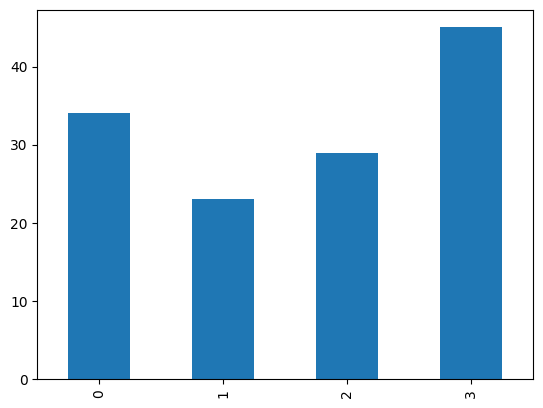

In [ ]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show()

 DataFrame Pandas 1
    Nama  Usia
0    Ali    34
1   Budi    23
2  Citra    29
3   Dina    45

DataFrame Pandas 2
    Nama Pekerjaan
0    Ali    Dokter
1   Budi      Guru
2  Citra  Insinyur
3   Dina   Perawat

 DataFrame Pandas 1 & 2
    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat

                     Visualisasi DataFrame


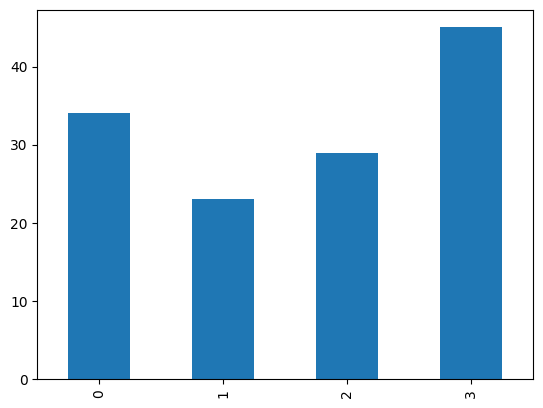

In [ ]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"],
               "Usia": [34, 23, 29, 45]
               }
df_pandas = pd.DataFrame(data_pandas)
print("\033[1m DataFrame Pandas 1\033[0m")
print(df_pandas)
print()

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"],
                 "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]
                 }
df_pandas_2 = pd.DataFrame(data_pandas_2)
print("\033[1mDataFrame Pandas 2\033[0m")
print(df_pandas_2)
print()

# Gabungan DataFrame Pandas 1 dan 2
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print("\033[1m DataFrame Pandas 1 & 2\033[0m")
print(df_joined)
print()

# Plotting Data
import matplotlib.pyplot as plt
df_joined['Usia'].plot(kind='bar')
print("\033[1m                     Visualisasi DataFrame\033[0m")
plt.show()


In [ ]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

In [ ]:
# Data Spark
data_spark = [
    ("Ali", "Manager", 34),
    ("Budi", "Karyawan Kontrak", 23),
    ("Citra", "Karyawan Tetap", 29),
    ("Dina", "Magang", 45),
]
columns = ["Nama", "Pekerjaan", "Usia"]
df = spark.createDataFrame(data_spark, columns)

# Data Pandas
data_pandas = {
    "Nama": ["Ali", "Budi", "Citra", "Dina"],
    "Usia": [34, 23, 29, 45],
    "Pekerjaan": ["Guru", "Karyawan", "Dosen", "Dokter"]
}
df_pandas = pd.DataFrame(data_pandas)

# Konversi Spark → Pandas
df_pandas_from_spark = df.toPandas()

# Merge tanpa menambahkan suffix pada kolom kiri
df_joined = pd.merge(
    df_pandas,
    df_pandas_from_spark,
    on="Nama",
    suffixes=(None, "_spark")  # kolom dari kanan mendapat sufiks _spark
)

# Misalnya, kita hanya ingin kolom "Pekerjaan" dari Spark
# dan ingin menyembunyikan versi Pandas:
df_joined = df_joined.drop(columns=["Pekerjaan"])  # Hapus kolom pandas
df_joined = df_joined.rename(columns={"Pekerjaan_spark": "Pekerjaan"})

print(df_joined)
print()

# Hitung rata-rata usia
avg_usia = df_joined["Usia"].mean()
print("\033[1mRata-rata usia:\033[0m", avg_usia)
print()


    Nama  Usia         Pekerjaan  Usia_spark
0    Ali    34           Manager          34
1   Budi    23  Karyawan Kontrak          23
2  Citra    29    Karyawan Tetap          29
3   Dina    45            Magang          45

Rata-rata usia: 32.75



In [ ]:
# Data Spark
data_spark = [
    ("Ali", "Manager", 34),
    ("Budi", "Karyawan Kontrak", 23),
    ("Citra", "Karyawan Tetap", 29),
    ("Dina", "Magang", 45),
]
columns = ["Nama", "Pekerjaan", "Usia"]
df = spark.createDataFrame(data_spark, columns)

# Data Pandas
data_pandas = {
    "Nama": ["Ali", "Budi", "Citra", "Dina"],
    "Usia": [34, 23, 29, 45],
    "Pekerjaan": ["Guru", "Karyawan", "Dosen", "Dokter"]
}
df_pandas = pd.DataFrame(data_pandas)

# Konversi Spark → Pandas
df_pandas_from_spark = df.toPandas()

# Menampilkan DataFrame hasil konversi
print("DataFrame dari Spark (Pandas):")
print(df_pandas_from_spark)
print()

# Menggabungkan DataFrame tanpa sifiks _x/_y
df_joined = pd.merge(
    df_pandas,
    df_pandas_from_spark,
    on="Nama",
    suffixes=("", "_spark")
)

# Hapus kolom dari Spark jika tidak ingin digunakan (pilih versi dari df_pandas)
df_joined = df_joined.drop(columns=["Pekerjaan_spark"])
# Jika kamu juga tidak ingin kolom Usia dari Spark, bisa tambahkan:
# df_joined = df_joined.drop(columns=["Usia_spark"])

# Pastikan kolom 'Usia' sudah tepat (tidak lagi _x/_y)
print("DataFrame setelah merge dan pembersihan kolom:")
print(df_joined)
print()

# Nilai maksimum usia
max_usia = df_joined["Usia"].max()
print("\033[1mNilai maksimum usia:\033[0m", max_usia)


DataFrame dari Spark (Pandas):
    Nama         Pekerjaan  Usia
0    Ali           Manager    34
1   Budi  Karyawan Kontrak    23
2  Citra    Karyawan Tetap    29
3   Dina            Magang    45

DataFrame setelah merge dan pembersihan kolom:
    Nama  Usia Pekerjaan  Usia_spark
0    Ali    34      Guru          34
1   Budi    23  Karyawan          23
2  Citra    29     Dosen          29
3   Dina    45    Dokter          45

Nilai maksimum usia: 45
